#  Investigation of No-Show Medical Appointments 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction  
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.   
A number of characteristics about the patient are included in each row.  

● ‘ScheduledDay’ tells us on what day the patient set up their appointment.   
● ‘Neighborhood’ indicates the location of the hospital.   
● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.   
● ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.


In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline




<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [6]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df1 = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df1.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [7]:
df1.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### - Checking null data

In [9]:
df1.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

*no null data*

#### - Checking the dulicated 

In [10]:
df1.duplicated().sum() 

0

*no duplicated data*

* no null data

* no null data

> **Observations / Changes Needed**: 
 - Changing column case and using underscores will make columns easier to read and work with
 - Changing column mispellings will make columns easier to read and work with

*no null data at all*

- Changing column mispellings will make columns easier to read and work with


### Data Cleaning 

In [11]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


#### - Correcting mis-spelled columns

In [12]:
new_col_dict =  {'Hipertension': 'Hypertension',
                'Handcap': 'Handicap','No-show':'No_show'}
df1.rename(columns=new_col_dict , inplace= True)
df1.head(1)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


#### - Changing into date datatype

In [13]:
df1['ScheduledDay'] = pd.to_datetime(df1['ScheduledDay'])
df1['AppointmentDay'] = pd.to_datetime(df1['AppointmentDay'])

#### - patient's age less than 0 field , -1 years old patient

In [14]:
# I assume this patient is infant who is 0-year old0
df1.loc[df1.Age<0,'Age'] = 0 

#### - Create new columns , day of week , out of columns about date

In [15]:
df1['dow_sch'] = df1['ScheduledDay'].dt.weekday_name
df1['dow_app'] = df1['AppointmentDay'].dt.weekday_name

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 : What is the overall proportion of no-show?

In [16]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


In [17]:
ns_prop = df1.groupby('No_show')['PatientId'].count() / df1.groupby('No_show')['PatientId'].count().sum()

([<matplotlib.patches.Wedge at 0x7f9f86dfca90>,
 [Text(-0.651955,-0.885977,'Show'), Text(0.711223,0.96652,'No_Show')],
 [Text(-0.355612,-0.48326,'79.8%'), Text(0.41488,0.563803,'20.2%')])

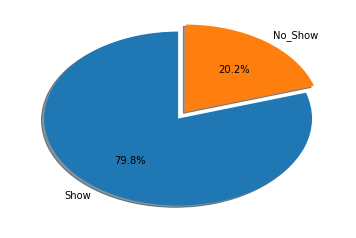

In [18]:
plt.pie(ns_prop,labels = ['Show','No_Show'],  autopct='%1.1f%%', startangle=90 , shadow= True , explode=[0,0.1])

In [19]:
pd.crosstab(df1.No_show, df1.No_show)

No_show,No,Yes
No_show,,
No,88208,0
Yes,0,22319


*This proportion has to be the 'comparision criteria' when we consider some feature has impact*

.

### Research Question 2  : Are gener and age related to no-show ?

#### - Gender 

male no-show ratio : 19.97% felmale no-show ratio : 20.31% 


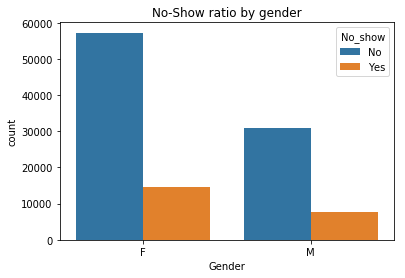

In [46]:
female_app = len(df1.loc[df1['Gender'] == "F"])
male_app = len(df1.loc[df1['Gender'] == "M"])

female_ns = len(df1.query('No_show == "Yes" and Gender == "F"'))
male_ns = len(df1.query('No_show == "Yes" and Gender == "M"'))

plt.title('No-Show ratio by gender')
sns.countplot(x=df1.Gender, hue=df1.No_show, data=df1 )



print('male no-show ratio : {:.2f}% felmale no-show ratio : {:.2f}% '.format(100*male_ns/male_app , 100*female_ns/female_app))

*Women's is slightly higher than men's*

### Research Question 3  : Are the personal features related to No-show probability?
 1. Disease & Handicap, 2. Schorlarship 

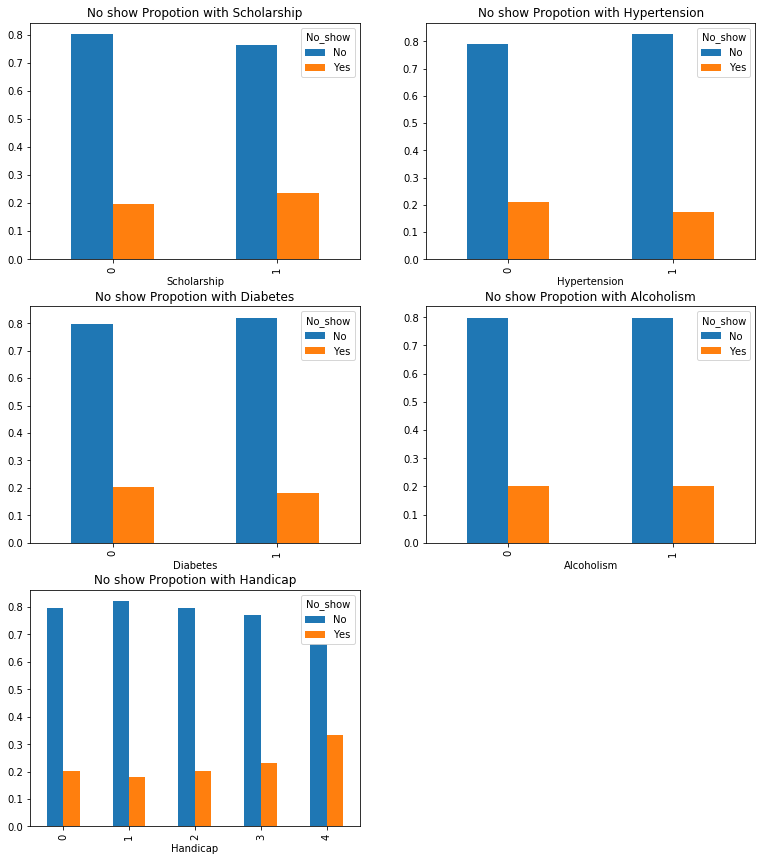

In [43]:
personal_vars = ['Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap']

fig = plt.figure(figsize=(13,20))
for i, var in enumerate(personal_vars):
    ax = fig.add_subplot(4, 2, i+1)
    pd.crosstab(df1[var] ,df1.No_show).apply(lambda x: x/x.sum(), axis=1).plot(ax=ax , kind='bar' )
    plt.title('No show Propotion with '+ personal_vars[i] )

*- The people with high-level of handicap tend to be no-show compared to the others*

*- Other diseases seem to be no meaningful relationship with no show*

### Research Question 4  : Did the SMS make the people show up ?

In [45]:
ct  = pd.crosstab(df1.SMS_received ,df1.No_show).apply(lambda x: x/x.sum(), axis=1)
print(ct)

No_show             No       Yes
SMS_received                    
0             0.832967  0.167033
1             0.724255  0.275745


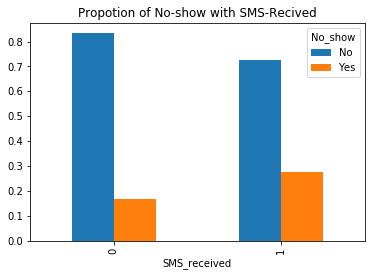

In [54]:
ct.plot(kind ='bar', title= 'Propotion of No-show with SMS-Recived')


*- Unlike common belief , SMS service can't prevent people from being no-show*

### Research Question 5  : Does the specific age group show high rate of No-show?

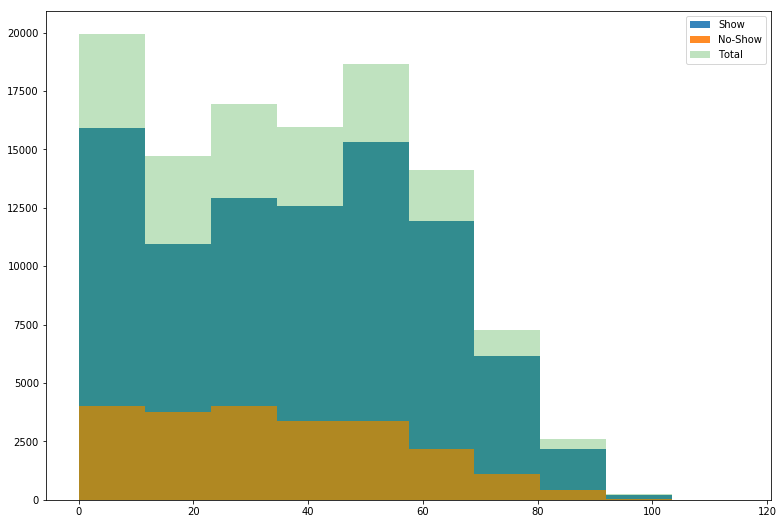

In [60]:
plt.figure(figsize=(13,9))
plt.hist(df1.loc[df1['No_show']=='No','Age'],alpha=0.9, bins=10 , label= 'Show' ,)
plt.hist(df1.loc[df1['No_show']=='Yes','Age'],alpha=0.9, bins=10 , label= 'No-Show')
plt.hist(df1['Age'], alpha=0.3, bins=10 , label= 'Total')


plt.legend(loc='upper right')
plt.show()

In [79]:
df1[df1.Age//10 == 1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,dow_sch,dow_app
9,7.812456e+13,5629123,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No,Wednesday,Friday
15,9.994839e+10,5620206,F,2016-04-26 08:47:27,2016-04-29,15,NOVA PALESTINA,0,0,0,0,0,1,No,Tuesday,Friday
22,8.632298e+14,5616091,M,2016-04-25 13:29:16,2016-04-29,13,CONQUISTA,0,0,0,0,0,1,Yes,Monday,Friday
31,3.112849e+11,5628907,M,2016-04-27 12:07:14,2016-04-29,12,NOVA PALESTINA,1,0,0,0,0,0,Yes,Wednesday,Friday
35,7.816264e+13,5637968,M,2016-04-29 07:34:42,2016-04-29,18,SÃO CRISTÓVÃO,0,0,0,0,0,0,No,Friday,Friday
50,1.827172e+14,5534661,F,2016-03-31 17:12:45,2016-04-29,19,GRANDE VITÓRIA,0,0,0,0,0,1,Yes,Thursday,Friday
56,4.751189e+14,5600005,M,2016-04-19 09:47:43,2016-04-29,12,NOVA PALESTINA,0,0,0,0,0,1,Yes,Tuesday,Friday
57,3.996740e+12,5638466,M,2016-04-29 08:03:51,2016-04-29,11,CONQUISTA,0,0,0,0,0,0,No,Friday,Friday
86,3.376224e+12,5595347,M,2016-04-18 12:31:34,2016-04-29,10,ILHA DE SANTA MARIA,0,0,0,0,0,1,No,Monday,Friday
90,8.782530e+14,5595362,M,2016-04-18 12:33:05,2016-04-29,11,JUCUTUQUARA,0,0,0,0,0,1,Yes,Monday,Friday


In [99]:
a = df1[df1.Age//10 == 1].No_show.value_counts() / df1[df1.Age//10 == 1].No_show.count()

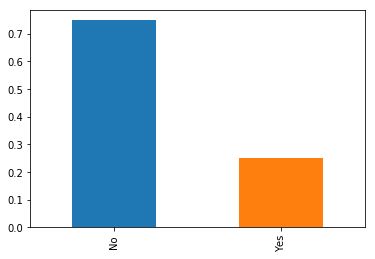

In [106]:
a.plot(kind='bar')

In [111]:
for i, age in enumerate(age_ls):
    print(i, age)

0 1
1 2
2 3
3 4
4 5
5 6
6 7
7 8
8 9
9 10
10 11
11 12


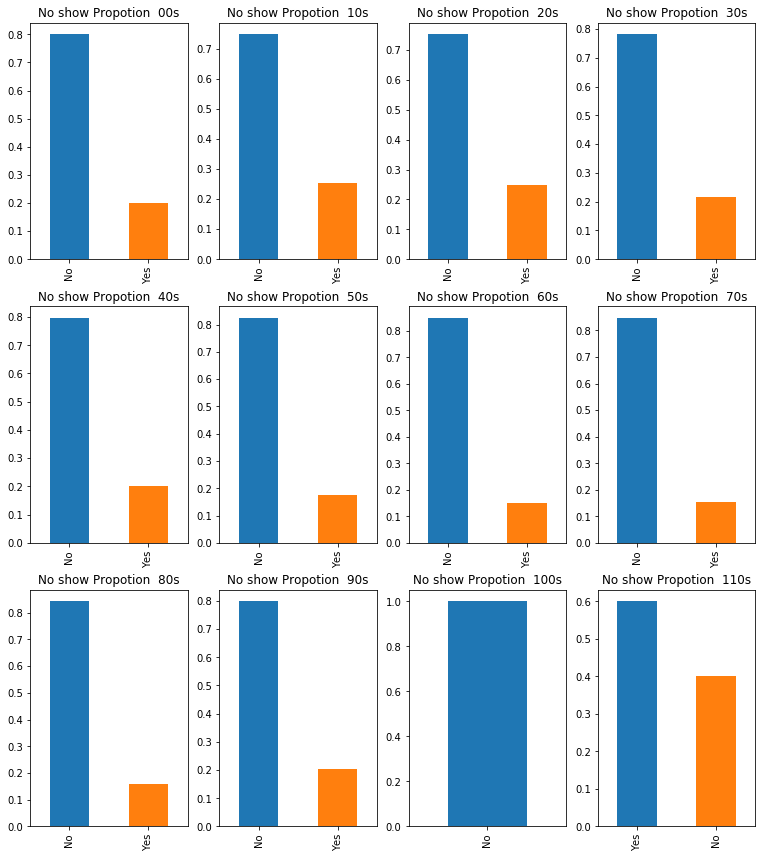

In [124]:
age_ls = [x for x in range(0,12)]
fig = plt.figure(figsize=(13,20))
for i, age in enumerate(age_ls):
    ax = fig.add_subplot(4, 4, i+1)
    (df1[df1.Age//10 == age].No_show.value_counts() / df1[df1.Age//10 == age].No_show.count()).plot(ax=ax , kind='bar')
#     pd.crosstab(df1[df1.Age//10 == i] ,df1[df1.Age//10 == 1].No_show).apply(lambda x: x/x.sum(), axis=1).plot(ax=ax , kind='bar' )
    plt.title('No show Propotion  '+ str(age_ls[i]) + '0s' )


*- 10's & 20's are shwoing higher no-show probability*

*- Those who age over 110 show very high probability but there are just a few*

In [132]:
df1.query('Age>110').count().max()b

5

### Research Question 6 : Does the day of week  infulence of No-show rate ?

In [63]:
NS_df = df1.loc[df1.No_show=='Yes']
S_df = df1.loc[df1.No_show=='No']

In [106]:
dow = ['Monday', 'Tuesday', 'Wednesday' , 'Thursday' , 'Friday' , 'Saturday']

In [107]:
No_show_rate_dow = dict()
Show_rate_dow = dict()
for d in dow :
    No_show_rate_dow[d] = NS_df[NS_df.dow_app == d].PatientId.count() / df1[df1.dow_app == d].PatientId.count()
    Show_rate_dow[d] = 1 - No_show_rate_dow[d] 
    

In [129]:
No_show_rate_dow['Monday']

0.20647149460708783

In [127]:
No_show_rate_dow.keys()

dict_keys(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

In [128]:
No_show_rate_dow.values()

dict_values([0.20647149460708783, 0.20093603744149766, 0.19689179263153825, 0.19354090566475329, 0.21226142278773857, 0.23076923076923078])

Text(0.5,1,'No_show ratio of overall appointments by DOW')

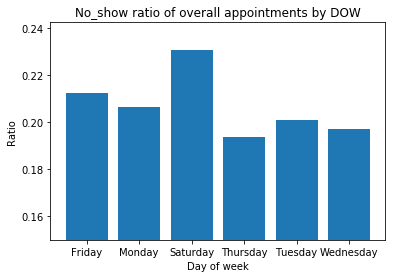

In [136]:
plt.bar(*zip(*No_show_rate_dow.items()))
plt.ylim(ymin=0.15)
plt.xlabel('Day of week')
plt.ylabel('Ratio')
plt.title('No_show ratio of overall appointments by DOW')


*- People tend to do no-show on weekend*

<a id='conclusions'></a>
## Conclusions


1. Women's no show rate is higher than men, but it is similar.

2. Disease and Scolarship dosen't effect the rate of No-show.

3. The disabled with high level handicap are more likely to miss their appointment
'
4. Patients who have scheduled appointments on saturday show high No-show probability.

5. SMS alarm service don't help the patients show up.

6. The patients who is 10's and 20's are more likley to be no-show than other age group.
   The distribution of age group for show-up and no-show are quite similar, 
